<a href="https://colab.research.google.com/github/nicolasvales/Challenge2_Telecom-X/blob/main/Telecom_X_An%C3%A1lisis_de_Evasi%C3%B3n_de_Clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TELECOM X - ANÁLISIS DE EVASIÓN DE CLIENTES


##Carga de bibliotecas y de base de datos

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_json('/content/drive/MyDrive/TelecomX_Data.json')

In [3]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


## Normalización y extracción de datos

In [4]:
datosIniciales=pd.concat([df['customerID'],df['Churn']],axis=1)
cliente=pd.json_normalize(df['customer'])
phone=pd.json_normalize(df['phone'])
internet=pd.json_normalize(df['internet'])
account=pd.json_normalize(df['account'])


In [5]:
cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         7267 non-null   object
 1   SeniorCitizen  7267 non-null   int64 
 2   Partner        7267 non-null   object
 3   Dependents     7267 non-null   object
 4   tenure         7267 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 284.0+ KB


In [6]:
cliente.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


In [7]:
cliente['Partner'] = cliente['Partner'].map({'Yes': 1, 'No': 0})
cliente['Dependents'] = cliente['Dependents'].map({'Yes': 1, 'No': 0})

In [8]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PhoneService   7267 non-null   object
 1   MultipleLines  7267 non-null   object
dtypes: object(2)
memory usage: 113.7+ KB


In [9]:
phone.tail()

,PhoneService,MultipleLines
7262,Yes,No
7263,Yes,Yes
7264,Yes,No
7265,Yes,No
7266,No,No phone service


In [10]:
phone['MultipleLines'].unique()


array(['No', 'Yes', 'No phone service'], dtype=object)

In [11]:
lineasTelefono = ['PhoneService', 'MultipleLines']
phone[lineasTelefono] = phone[lineasTelefono].apply(lambda x: x.map({'Yes': 1, 'No': 0, 'No phone service': 0}))

In [12]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   InternetService   7267 non-null   object
 1   OnlineSecurity    7267 non-null   object
 2   OnlineBackup      7267 non-null   object
 3   DeviceProtection  7267 non-null   object
 4   TechSupport       7267 non-null   object
 5   StreamingTV       7267 non-null   object
 6   StreamingMovies   7267 non-null   object
dtypes: object(7)
memory usage: 397.5+ KB


In [13]:
internet.tail()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
7262,DSL,Yes,No,No,Yes,No,No
7263,Fiber optic,No,No,No,No,No,Yes
7264,DSL,No,Yes,No,No,No,No
7265,DSL,Yes,No,Yes,Yes,No,Yes
7266,DSL,Yes,Yes,Yes,No,Yes,Yes


In [14]:
internet['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [15]:
Serviciointernet = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
internet[Serviciointernet] = internet[Serviciointernet].apply(lambda x: x.map({'Yes': 1, 'No': 0, 'No internet service': 0}))

In [16]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   InternetService   7267 non-null   object
 1   OnlineSecurity    7267 non-null   int64 
 2   OnlineBackup      7267 non-null   int64 
 3   DeviceProtection  7267 non-null   int64 
 4   TechSupport       7267 non-null   int64 
 5   StreamingTV       7267 non-null   int64 
 6   StreamingMovies   7267 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 397.5+ KB


In [17]:
account.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Contract          7267 non-null   object 
 1   PaperlessBilling  7267 non-null   object 
 2   PaymentMethod     7267 non-null   object 
 3   Charges.Monthly   7267 non-null   float64
 4   Charges.Total     7267 non-null   object 
dtypes: float64(1), object(4)
memory usage: 284.0+ KB


In [18]:
account.tail()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
7262,One year,No,Mailed check,55.15,742.9
7263,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,Month-to-month,Yes,Mailed check,50.30,92.75
7265,Two year,No,Mailed check,67.85,4627.65
7266,Two year,No,Electronic check,59.00,3707.6


In [19]:
account['Contract'].unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [20]:
cantidad_vacios = account['Charges.Total'].str.strip().eq('').sum()
cantidad_vacios

np.int64(11)

In [21]:
account['Charges.Total'].isna().sum()


np.int64(0)

In [22]:
account['Charges.Total'] = pd.to_numeric(
    account['Charges.Total'].str.replace(r'[$,]', '', regex=True),
    errors='coerce'
).fillna(0)

In [23]:
account['Charges.Total']


,Charges.Total
0,593.30
1,542.40
2,280.85
3,1237.85
4,267.40
...,...
7262,742.90
7263,1873.70
7264,92.75
7265,4627.65


In [24]:
account.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Contract          7267 non-null   object 
 1   PaperlessBilling  7267 non-null   object 
 2   PaymentMethod     7267 non-null   object 
 3   Charges.Monthly   7267 non-null   float64
 4   Charges.Total     7267 non-null   float64
dtypes: float64(2), object(3)
memory usage: 284.0+ KB


In [25]:
pd.unique(account['Contract'])

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [26]:
pd.unique(account['PaperlessBilling'])

array(['Yes', 'No'], dtype=object)

In [27]:
pd.unique(account['PaymentMethod'])

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [28]:

account['PaperlessBilling'] = pd.to_numeric(
    account['PaperlessBilling'].replace({'Yes': 1, 'No': 0}),
    errors='coerce'
).fillna(0).astype(int)

/tmp/ipython-input-28-2333751964.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  account['PaperlessBilling'].replace({'Yes': 1, 'No': 0}),


In [29]:
datosIniciales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
dtypes: object(2)
memory usage: 113.7+ KB


In [30]:
datosIniciales.head()

,customerID,Churn
0,0002-ORFBO,No
1,0003-MKNFE,No
2,0004-TLHLJ,Yes
3,0011-IGKFF,Yes
4,0013-EXCHZ,Yes


In [31]:
pd.unique(datosIniciales['Churn'])

array(['No', 'Yes', ''], dtype=object)

In [32]:
datosIniciales['Churn'] = pd.to_numeric(
   datosIniciales['Churn'].replace({'Yes': 1, 'No': 0}),
    errors='coerce'
).fillna(0).astype(int)

In [33]:

account['Cuentas_Diarias'] = account['Charges.Monthly'] / 30.44
account['Cuentas_Diarias'] = account['Cuentas_Diarias'].round(2)
account

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,One year,1,Mailed check,65.60,593.30,2.16
1,Month-to-month,0,Mailed check,59.90,542.40,1.97
2,Month-to-month,1,Electronic check,73.90,280.85,2.43
3,Month-to-month,1,Electronic check,98.00,1237.85,3.22
4,Month-to-month,1,Mailed check,83.90,267.40,2.76
...,...,...,...,...,...,...
7262,One year,0,Mailed check,55.15,742.90,1.81
7263,Month-to-month,1,Electronic check,85.10,1873.70,2.80
7264,Month-to-month,1,Mailed check,50.30,92.75,1.65
7265,Two year,0,Mailed check,67.85,4627.65,2.23


In [34]:
datosIniciales

,customerID,Churn
0,0002-ORFBO,0
1,0003-MKNFE,0
2,0004-TLHLJ,1
3,0011-IGKFF,1
4,0013-EXCHZ,1
...,...,...
7262,9987-LUTYD,0
7263,9992-RRAMN,1
7264,9992-UJOEL,0
7265,9993-LHIEB,0


In [35]:
df_final = pd.concat([datosIniciales,cliente,phone,internet,account], axis=1)


In [36]:
df_final.describe()


,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2277.182035,2.126155
std,0.437115,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,2268.648587,0.989744
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.600000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,396.200000,1.160000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1389.200000,2.310000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3778.525000,2.950000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.900000


In [37]:
df_final

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.16
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,1.97
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.43
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.22
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.81
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.80
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.65
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.23


In [38]:
df_final.to_csv('datos_TelecomXprocesado.csv', index=False)

##Visualización de gráficos

In [39]:
churn_counts = df_final['Churn'].value_counts()


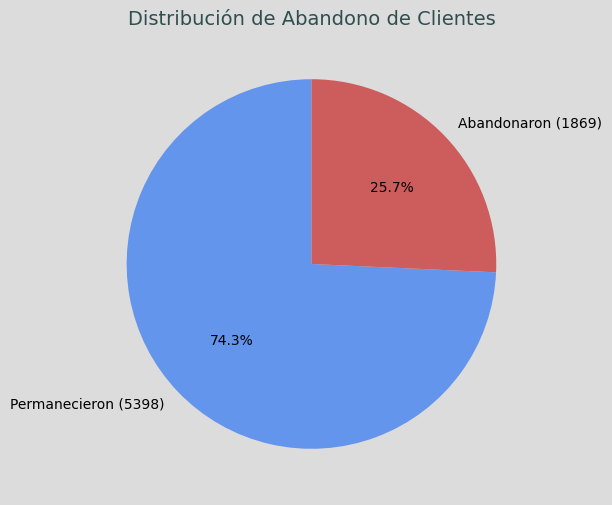

In [40]:
plt.figure(figsize=(8, 6), facecolor='gainsboro')
plt.pie(churn_counts.values, labels=[f'Permanecieron ({churn_counts.values[0]})', f'Abandonaron ({churn_counts.values[1]})'], autopct='%1.1f%%', startangle=90, colors=['cornflowerblue', 'indianred'])
plt.title('Distribución de Abandono de Clientes', fontsize=14,color='darkslategrey')
plt.show()



```
# Tiene formato de código
```

En el gráfico de torta(pie) se observa un importante abandono del servicio, aproximadamente 1/4 del total.

In [41]:
genrer_count=df_final['gender'].value_counts()

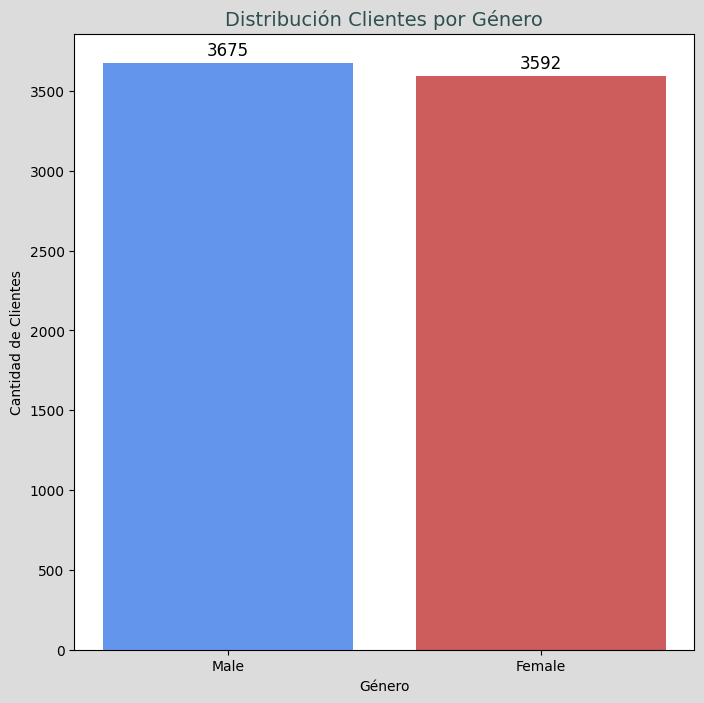

In [42]:
plt.figure(figsize=(8, 8),facecolor='gainsboro')
plt.bar(genrer_count.index,genrer_count.values,color=['cornflowerblue', 'indianred'])
plt.xlabel('Género')
plt.ylabel('Cantidad de Clientes')
plt.title('Distribución Clientes por Género', fontsize=14,color='darkslategrey')

for i, count in enumerate(genrer_count.values):
    plt.text(i, count + 50, str(count), ha='center', fontsize=12)

plt.show()

En este gráfico de barras(bar) se observa que la diferencia de usuarios(que contraron y tambien los que no continuan con el servicio) es menor. Siendo mayor la cantidad de hombres que contraron el servicio.

In [43]:
churned_customers = df_final[df_final['Churn'] == 1]
churn_gender_counts = churned_customers['gender'].value_counts()

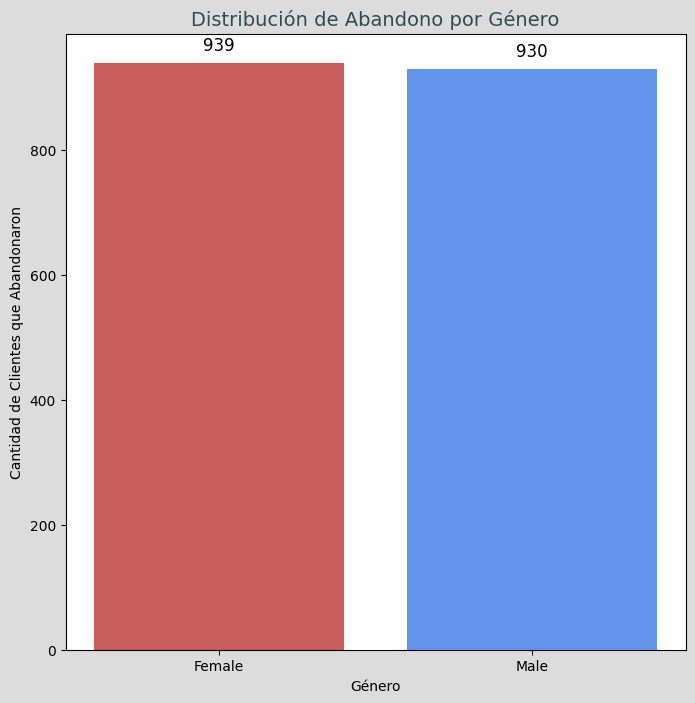

In [44]:

plt.figure(figsize=(8, 8),facecolor='gainsboro')
plt.bar(churn_gender_counts.index, churn_gender_counts.values, color=['indianred', 'cornflowerblue'])
plt.xlabel('Género')
plt.ylabel('Cantidad de Clientes que Abandonaron')
plt.title('Distribución de Abandono por Género', fontsize=14,color='darkslategrey')

for i, count in enumerate(churn_gender_counts.values):
    plt.text(i, count + 20, str(count), ha='center', fontsize=12)

plt.show()

En el siguiente gráfico podemos observar que el abandono del servicio por género sigue siendo menor pero las mujeres son los clientes que más abandonan el servicio por una diferencia menor.

In [45]:
contract= account['Contract'].value_counts()


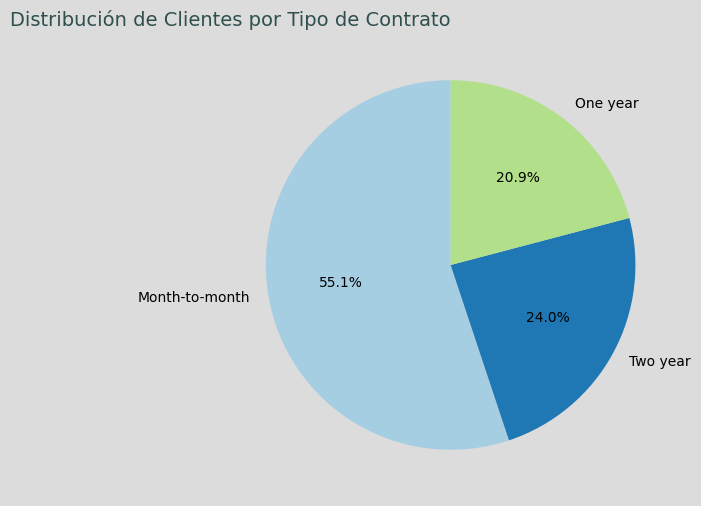

In [46]:
plt.figure(figsize=(8, 6),facecolor='gainsboro')
plt.pie(contract.values, labels=contract.index, autopct='%1.1f%%', startangle=90,
colors=sns.color_palette("Paired", len(contract)))
plt.title('Distribución de Clientes por Tipo de Contrato', fontsize=14,ha='right',color='darkslategrey')
plt.show()

En el gráfico podemos observar la diferencia de cantidad de usuarios entre los 3 planes (mes a mes, por año y por dos años). Donde tenemos en primer lugar el contrato por mes a mes, en segundo el de dos años y en tercero el anual.



Porcentaje de abandono por tipo de contrato:


Churn,0,1
Contract,,
Month-to-month,0.586767,0.413233
One year,0.890718,0.109282
Two year,0.972461,0.027539


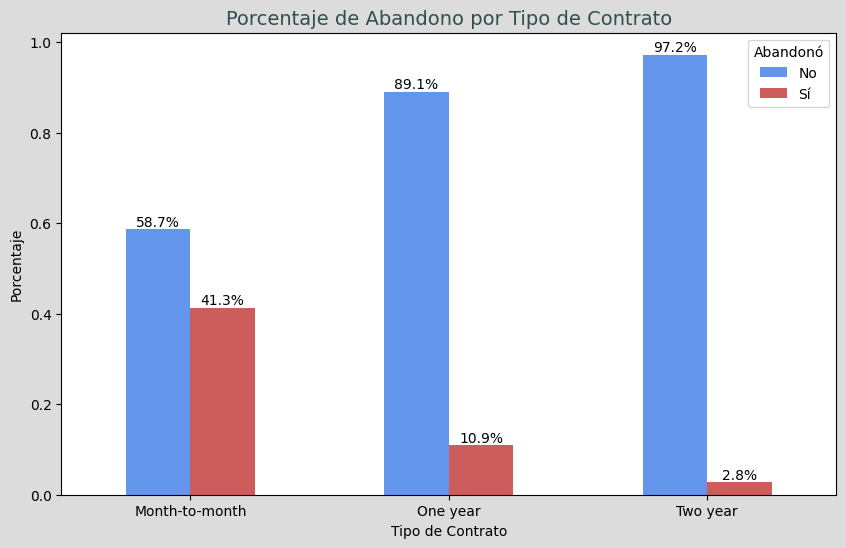

In [47]:
churn_by_contract = df_final.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()

print("Porcentaje de abandono por tipo de contrato:")
display(churn_by_contract)

plt.figure(facecolor='gainsboro')
ax = churn_by_contract.plot(kind='bar', figsize=(10, 6),color=['cornflowerblue','indianred'],ax=plt.gca())
plt.title('Porcentaje de Abandono por Tipo de Contrato', fontsize=14,color='darkslategrey')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Porcentaje')
plt.xticks(rotation=0)
plt.legend(title='Abandonó', labels=['No', 'Sí'])

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

En el siguiente gráfico podemos observar una difencia notable en cuanto a las bajas de usuarios de distintos planes, el que más evidente es el de mes a mes. Dandonos a entender una incomformidad grave en cuanto al desempeño del servicio.

Porcentaje de abandono por edad:


Churn,0,1
SeniorCitizen,,
0,0.771076,0.228924
1,0.597293,0.402707


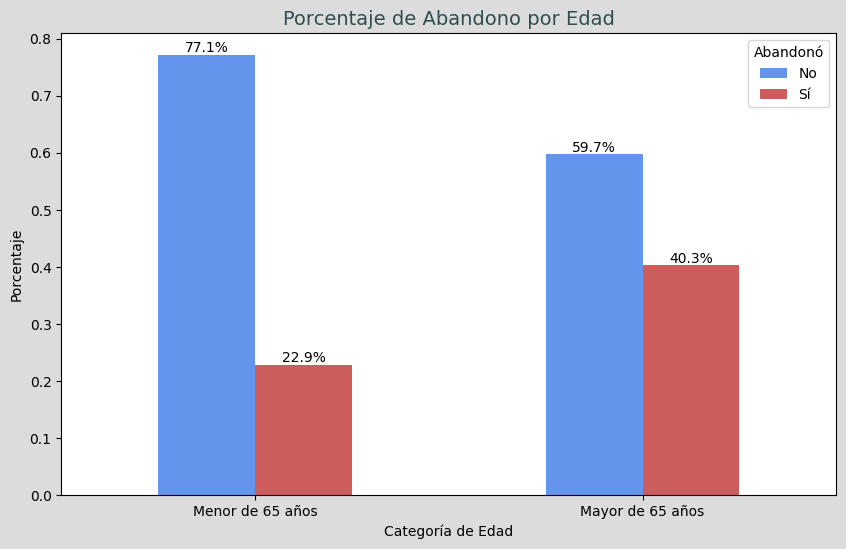

In [48]:
señior_churn = df_final.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack()

print("Porcentaje de abandono por edad:")
display(señior_churn)

plt.figure(facecolor='gainsboro')
ax = señior_churn.plot(kind='bar',figsize=(10, 6), color=['cornflowerblue', 'indianred'],ax=plt.gca())
plt.title('Porcentaje de Abandono por Edad', fontsize=14,color='darkslategrey')
plt.xlabel('Categoría de Edad')
plt.ylabel('Porcentaje')
plt.xticks(ticks=[0, 1], labels=['Menor de 65 años', 'Mayor de 65 años'], rotation=0)
plt.legend(title='Abandonó', labels=['No', 'Sí'])
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

En el gráfico se observa una marcada cancelación del servicio por parte de los usuarios mayores de 65 años por sobre el porcentaje de cancelaciones de usuarios menores a dicha edad.

Porcentaje de abandono por Tipo de Servicio:


Churn,0,1
InternetService,,
DSL,0.815514,0.184486
Fiber optic,0.594434,0.405566
No,0.928526,0.071474


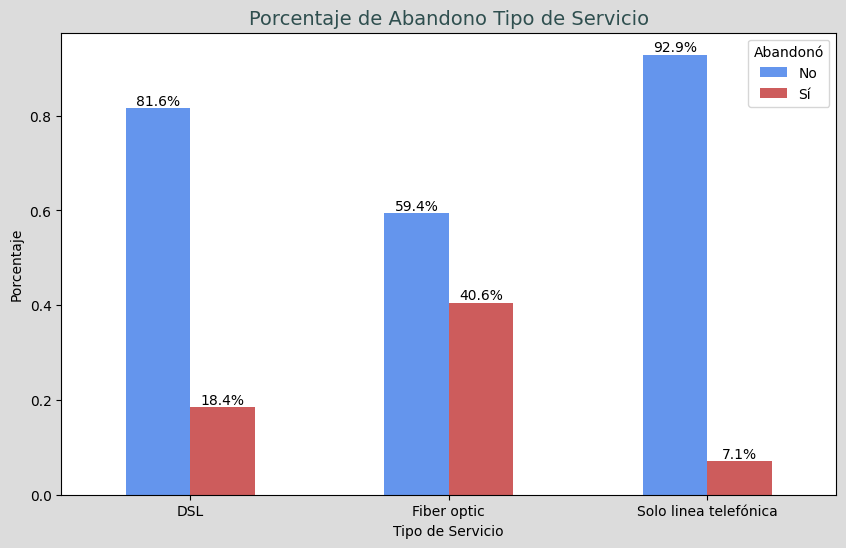

In [49]:
Internet_Service_churn = df_final.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack()

print("Porcentaje de abandono por Tipo de Servicio:")
display(Internet_Service_churn)

plt.figure(facecolor='gainsboro')
ax = Internet_Service_churn.plot(kind='bar', figsize=(10,6), color=['cornflowerblue', 'indianred'],ax=plt.gca())
plt.title('Porcentaje de Abandono Tipo de Servicio', fontsize=14,color='darkslategrey')
plt.xlabel('Tipo de Servicio')
plt.ylabel('Porcentaje')
plt.xticks(ticks=[0, 1, 2], labels=['DSL', 'Fiber optic', 'Solo linea telefónica'], rotation=0)
plt.legend(title='Abandonó', labels=['No', 'Sí'])

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

En este gráfico de barras(bar) se marca una tendecia de abandono de servicio del tipo de fibra optica. Mucho menor en el caso de la DSL y de la linea telefónica.

/tmp/ipython-input-50-944050583.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Charges.Total', data=df_final,palette=['cornflowerblue', 'indianred'])


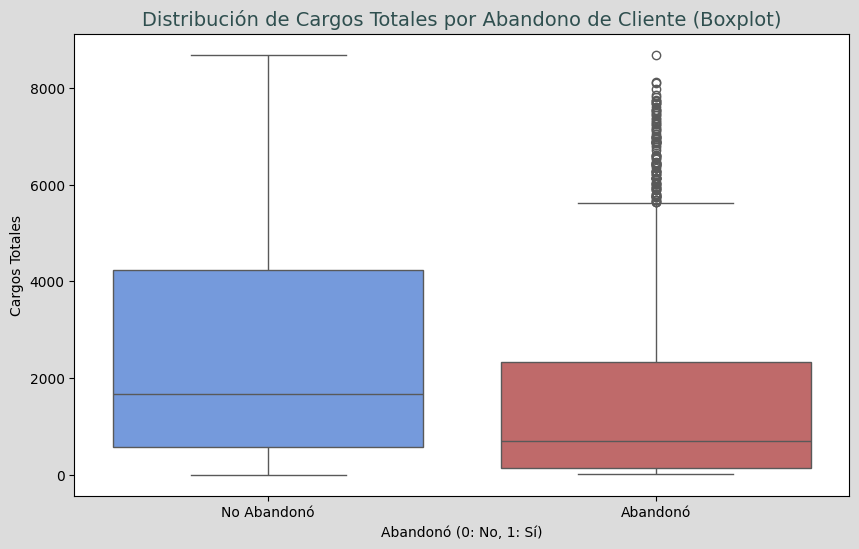

In [50]:
plt.figure(figsize=(10, 6),facecolor='gainsboro')
sns.boxplot(x='Churn', y='Charges.Total', data=df_final,palette=['cornflowerblue', 'indianred'])
plt.title('Distribución de Cargos Totales por Abandono de Cliente (Boxplot)', fontsize=14,color='darkslategrey')
plt.xlabel('Abandonó (0: No, 1: Sí)')
plt.ylabel('Cargos Totales')
plt.xticks(ticks=[0, 1], labels=['No Abandonó', 'Abandonó'])
plt.show()

En el gráfico de caja(boxplot) podemos observar el gasto total de los clientes que continuan y los que abandonaron el servicio siendo el de abandono menor al gasto de los que continuan. Cabe aclarar que varios clientes que abandonaron hicieron un gasto superior a los clientes activos.

/tmp/ipython-input-51-3624140753.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Charges.Monthly', data=df_final,palette=['cornflowerblue', 'indianred'])


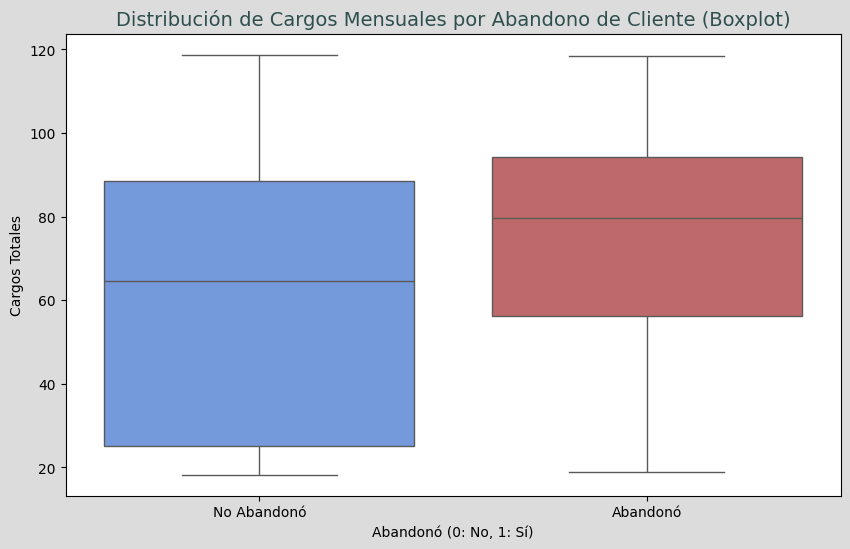

In [51]:
plt.figure(figsize=(10, 6),facecolor='gainsboro')
sns.boxplot(x='Churn', y='Charges.Monthly', data=df_final,palette=['cornflowerblue', 'indianred'])
plt.title('Distribución de Cargos Mensuales por Abandono de Cliente (Boxplot)', fontsize=14,color='darkslategrey')
plt.xlabel('Abandonó (0: No, 1: Sí)')
plt.ylabel('Cargos Totales')
plt.xticks(ticks=[0, 1], labels=['No Abandonó', 'Abandonó'])
plt.show()

En el gráfico de caja(boxplot) podemos observar el gasto mensual de los clientes que continuan y los que abandonaron el servicio siendo el de abandono mayor al gasto de los que continuan.

Cantidad y Porcentaje de Abandono por Método de Pago (respecto al total de abandonos):


,Cantidad de Abandonos,Porcentaje de Abandono
PaymentMethod,,
Electronic check,1071,57.303371
Mailed check,308,16.479401
Bank transfer (automatic),258,13.804173
Credit card (automatic),232,12.413055


/tmp/ipython-input-52-4098392570.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_payment_df['Porcentaje de Abandono'], y=churn_payment_df.index, palette="Paired")


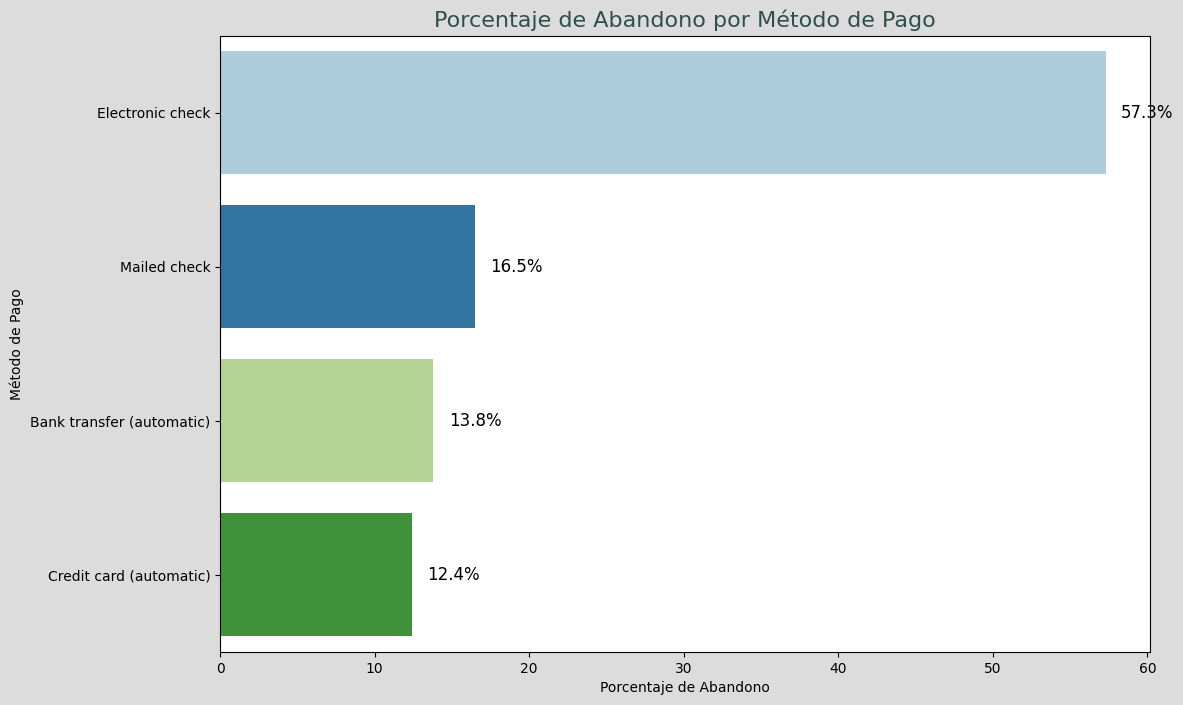

In [52]:


churned_customers = df_final[df_final['Churn'] == 1]

churn_by_payment_method = churned_customers['PaymentMethod'].value_counts()

total_churned = len(churned_customers)
churn_percentage_by_payment_method = (churn_by_payment_method / total_churned) * 100

churn_payment_df = pd.DataFrame({
    'Cantidad de Abandonos': churn_by_payment_method,
    'Porcentaje de Abandono': churn_percentage_by_payment_method
})

print("Cantidad y Porcentaje de Abandono por Método de Pago (respecto al total de abandonos):")
display(churn_payment_df)

plt.figure(figsize=(12, 8),facecolor='gainsboro')
ax = sns.barplot(x=churn_payment_df['Porcentaje de Abandono'], y=churn_payment_df.index, palette="Paired")

plt.title('Porcentaje de Abandono por Método de Pago', fontsize=16,color='darkslategrey')
plt.xlabel('Porcentaje de Abandono')
plt.ylabel('Método de Pago')

for p in ax.patches:
    width = p.get_width()
    plt.text(width + 1, p.get_y() + p.get_height() / 2.,
             f'{width:.1f}%',
             ha='left', va='center', fontsize=12)

plt.show()

En el gráfico de barras horizontales(barplot) podemos observar una diferencia muy marcada de abandono de clientes que utilizan el metodo de pago por Electronic check comparado con los otros 3 metodos. Siendo mas de la mitad de los clientes que abandonan.